# 02 - Univariate Analysis
In this file, the majority of the attributes are looked at one at a time, to determine more columns, and maybe some rows, need to be removed tocreate some consistent data. 

In [1]:
# All import insertions
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import isnull
from sklearn import preprocessing
import os    # For file paths
import re    # Regular Expressions

import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

from sklearn import feature_selection # For the Variance Check


In [2]:
# Inserting some Jupyter Notebook settings
pd.reset_option('display.max_categories')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

# pd.set_option('display.max_categories', 1000)
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [3]:
# Open the file
df = pd.read_csv("../data/processed/data_cleaned.csv")

### Game Id count
31007 plays among 688 games

In [4]:
# Confirming that there are no null values in all the database
df.isna().sum().sum()

0

In [5]:
# Number of unique games
df['GameId'].nunique()

688

## PlayID count
Unique number to identify

In [6]:
df['PlayId'].nunique()

31007

In [7]:
# Moving the PlayId into the index code. Removing from the database.
df = df.set_index('PlayId')
df.head()

,GameId,Team,isHomeTeam,X,Y,S,A,Dis,Orientation,Dir,...,Halfbacks,LineBackers,NoseTackles,OffensiveGuards,OffensiveTackles,Quarterbacks,RunningBacks,Safeties,TightEnds,WideReceivers
PlayId,,,,,,,,,,,,,,,,,,,,,
20170907000118,2017090700,home,1,78.75,30.53,3.63,3.35,0.38,161.98,245.74,...,0,1,0,2,2,1,1,3,1,3
20170907000139,2017090700,home,1,71.07,27.16,3.06,2.41,0.34,210.70,312.20,...,0,1,0,2,2,1,1,3,1,3
20170907000189,2017090700,home,1,48.66,19.11,5.77,2.42,0.60,140.82,221.96,...,0,1,0,2,2,1,1,3,1,3
20170907000345,2017090700,home,1,15.53,25.36,4.45,3.20,0.46,186.22,275.44,...,0,3,1,2,3,1,1,2,2,0
20170907000395,2017090700,away,0,29.99,27.12,3.90,2.53,0.44,34.27,157.92,...,0,2,0,1,3,1,1,4,3,1


In [8]:
# Removing the game id code. It's an apttribute that isn't necessary for analysis
df.drop(['GameId'],axis = 1, inplace = True)

In [9]:
# Many of these fields will be eliminated in this script
desc = df.describe(percentiles = [.20, .40, .60, .80], include = ['object', 'float32', 'int32', 'float64', 'int64'] ).transpose()
dvar = pd.DataFrame(df.var(), columns=['var'])
mergeddesc = desc.join(dvar)
mergeddesc.shape

(71, 14)

In [10]:
mergeddesc

,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max,var
Team,31007,2,home,15617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isHomeTeam,31007,NaN,NaN,NaN,0.50366,0.499995,0,0,0,1,1,1,1,0.249995
X,31007,NaN,NaN,NaN,60.0936,26.1968,5.25,32.77,50.85,60.31,69.69,87.048,115.1,686.270178
Y,31007,NaN,NaN,NaN,26.8297,3.46771,7.59,23.53,25.67,26.85,28,30.13,48.21,12.025010
S,31007,NaN,NaN,NaN,4.31258,1.12797,0,3.43,4.03,4.29,4.55,5.2,8.94,1.272319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Quarterbacks,31007,NaN,NaN,NaN,1.00471,0.0693945,0,1,1,1,1,1,2,0.004816
RunningBacks,31007,NaN,NaN,NaN,1.01171,0.297312,0,1,1,1,1,1,3,0.088394
Safeties,31007,NaN,NaN,NaN,2.00458,0.547002,0,2,2,2,2,2,5,0.299211
TightEnds,31007,NaN,NaN,NaN,1.42652,0.649014,0,1,1,1,1,2,4,0.421219


## Yards and isFirstdown Variables (Predictor variable)
Here, we are looking at the predictor variable. Yards was the original predictor variable. As you can see from the describe count, the mean and median is around 4 and 3, respectively. With a range of -15 to 99, this column will definitely be normalized before analysis. Before we do any machine learning methods, because the counts are at 21%, and not 50%, will have to be oversampled before analysis.

In [11]:
df['Yards'].describe()

count    31007.000000
mean         4.227626
std          6.449966
min        -15.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         99.000000
Name: Yards, dtype: float64

In [12]:
# Counts of successful first downs (1) vs failed first downs (0)
df['isFirstDown'].value_counts()

0    24415
1     6592
Name: isFirstDown, dtype: int64

In [13]:
# Percentage of first downs
df['isFirstDown'].value_counts(normalize = True).mul(100).round(1)

0    78.7
1    21.3
Name: isFirstDown, dtype: float64

In [14]:
pd.set_option('display.max_categories', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df[df['Yards'] == df['Yards'].min()].transpose()

PlayId,20191006020179
Team,home
isHomeTeam,1
X,77.52
Y,21.16
S,5.39
A,2.4
Dis,0.53
Orientation,229.14
Dir,209.7
NflId,2543743


## Team variables
Whether the team that has posession of the ball has the home field advantage, or are the visitor team. Unsure whether to keep this field, to determine if home field advantage is important to the success or not. 

In [15]:
df['Team'].count()

31007

In [16]:
# Pretty close to a 50-50 collection of home and away teams
df['Team'].value_counts()

home    15617
away    15390
Name: Team, dtype: int64

In [17]:
# Confirming the numerical code equal to the Team variable
df['isHomeTeam'].value_counts()

1    15617
0    15390
Name: isHomeTeam, dtype: int64

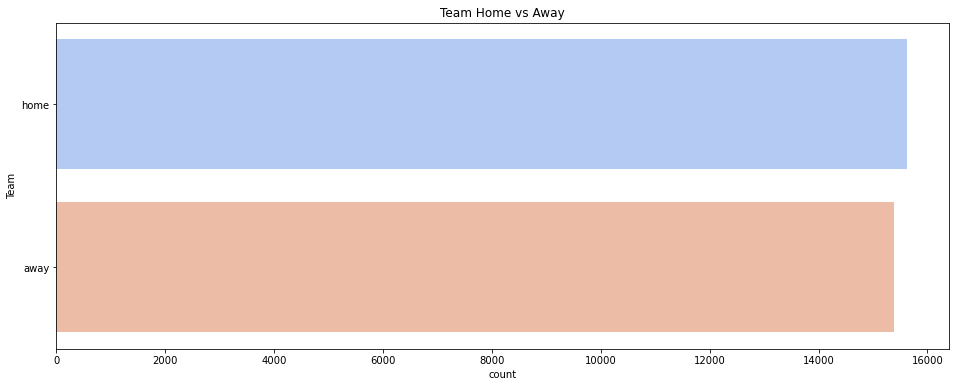

In [18]:
plt.figure(figsize=(16, 6))
snsj=sns.countplot(y=df['Team'] ,palette="coolwarm")
plt.title('Team Home vs Away')
plt.savefig("../reports/figures/data_team.png")

## Season variable
A breakdown of all the season years. Not all of the 2019 weeks have been covered, but it shouldn't affect the whole data set. We could remove the 2019 season for balance, but it's not worth removing 7836 records. 

In [19]:
df['Season'].value_counts().reset_index().sort_values(by='index')

,index,Season
0,2017,11900
1,2018,11271
2,2019,7836


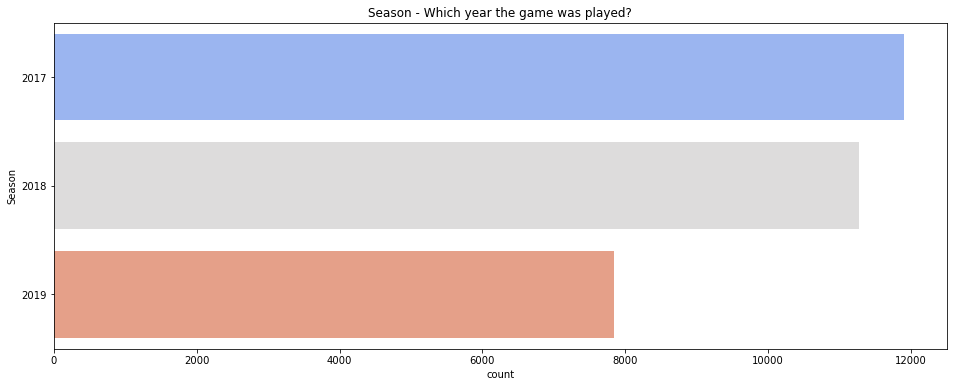

In [20]:
plt.figure(figsize=(16, 6))
snsj=sns.countplot(y=df['Season'] ,palette="coolwarm")
plt.title('Season - Which year the game was played?')
plt.savefig("../reports/figures/data_season.png")

## Yardline variables
The yard positions. The majority of the data is at the 75 yards, which makes sense. On the opening kick, the ball has a large chance to get a touch back, which means that the kick goes further than the end zone, which gives the receiving the team to start their drive on the 25 yard line. This mostly happens at the start of the game, start of the third quarter, and after every touchdown, field goal or safety. Also, there are a good number of running plays at the 1 yard line, which is a popular play to run the ball into the end zone for the touchdown.

In [21]:
df['YardsToTouchdown'].value_counts().sort_index()

1      562
2      239
3      199
4      204
5      209
6      193
7      199
8      222
9      192
10     208
11     205
12     238
13     225
14     223
15     249
16     223
17     202
18     230
19     268
20     234
21     236
22     284
23     224
24     278
25     269
26     253
27     259
28     259
29     275
30     317
31     289
32     264
33     286
34     307
35     300
36     272
37     278
38     276
39     311
40     366
41     319
42     300
43     315
44     293
45     366
46     316
47     291
48     323
49     346
50     391
51     353
52     344
53     375
54     414
55     408
56     355
57     367
58     370
59     412
60     497
61     401
62     414
63     476
64     471
65     475
66     562
67     415
68     411
69     452
70     492
71     405
72     391
73     366
74     425
75    2318
76     324
77     306
78     304
79     319
80     532
81     267
82     239
83     237
84     204
85     301
86     220
87     198
88     182
89     174
90     234
91     161

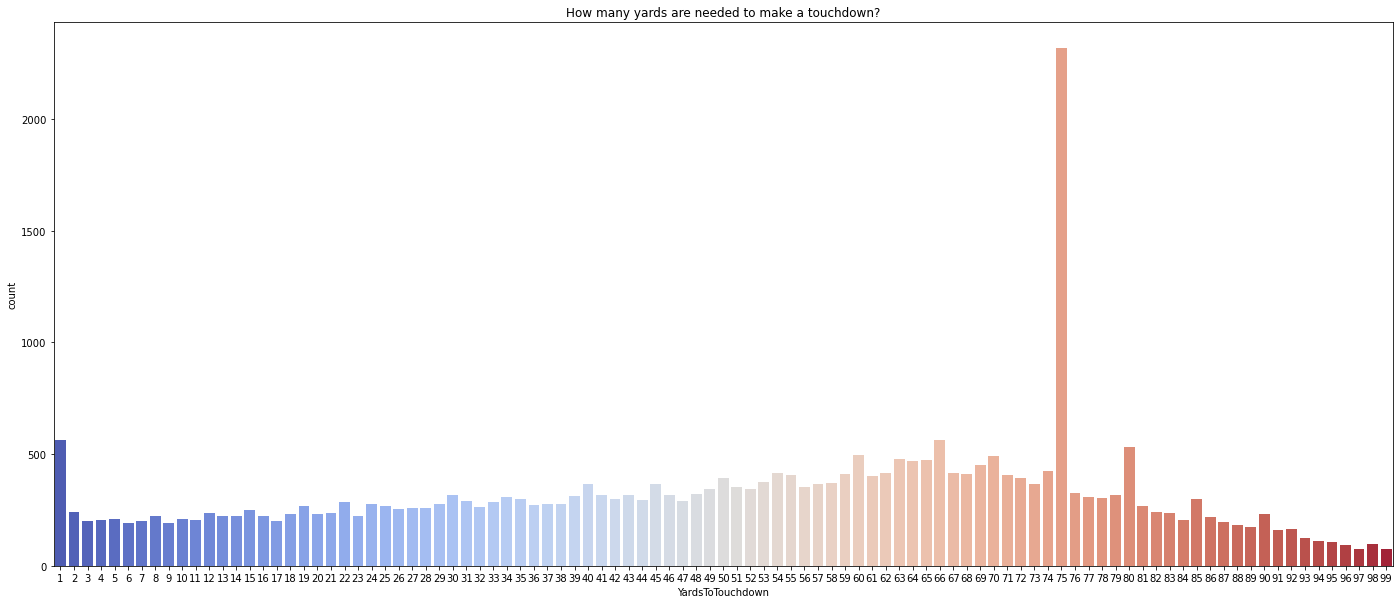

In [22]:
plt.figure(figsize=(24, 10))
snsj=sns.countplot(x=df['YardsToTouchdown'] ,palette="coolwarm")
plt.title('How many yards are needed to make a touchdown?')
plt.savefig("../reports/figures/data_YardsToTouchdown.png")

## Quarter variable
Each game of football is broken down into 4 quarters. At the end of the 4th quarter, the team with the most points wins. In case of a tie, overtime begins, which is marked as a 5. There are not a lot of overtime plays and there is a possible chance for the data to be skewed. This means it's worth removing the 197 records. 

In [23]:
df['Quarter'].value_counts().sort_index()

1    7942
2    7441
3    7648
4    7779
5     197
Name: Quarter, dtype: int64

In [24]:
df[df['isFirstDown'] == 0]['Quarter'].value_counts().sort_index()

1    6300
2    5795
3    5969
4    6197
5     154
Name: Quarter, dtype: int64

In [25]:
df[df['isFirstDown'] == 1]['Quarter'].value_counts().sort_index()

1    1642
2    1646
3    1679
4    1582
5      43
Name: Quarter, dtype: int64

In [26]:
df['Quarter'].describe()

count    31007.000000
mean         2.511336
std          1.141080
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Quarter, dtype: float64

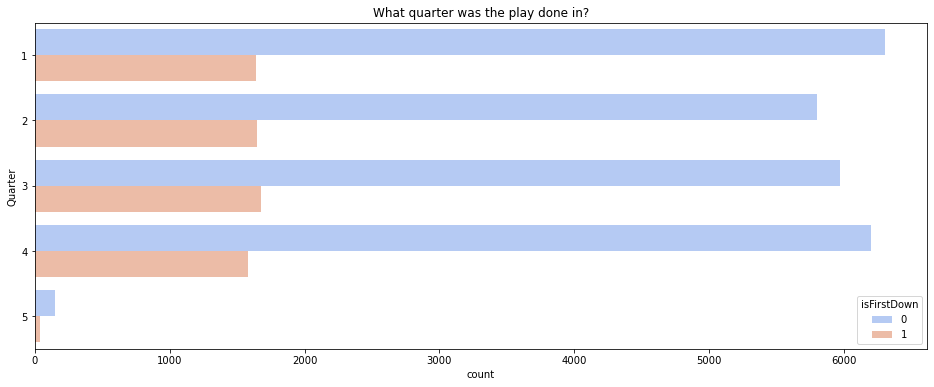

In [27]:
plt.figure(figsize=(16, 6))
snsj=sns.countplot(y=df['Quarter'], hue=df['isFirstDown'], palette="coolwarm")
plt.title('What quarter was the play done in?')
plt.savefig("../reports/figures/data_quarter.png")

In [28]:
df = df[(df['Quarter']>=1) & (df['Quarter']<=4)]

## Down variable
Each drive starts with a first down with 10 yards to gain. For each play done, if the 10 yards wasn't gained, the down number is added, and the drive gained. If the 10 yards is gained, the down counter is reset back to first down, and a new 10 yard marker is placed. If the team cannot make the 10 yards on the 4th down, it results in a loss of downs.

Originally I was considering removing the 4th down because there is only 267 rows, but it's necessary to keep these because a lot of teams run during this play to get the final yards needed. And as you can see in the data below, the number of successful first downs on 4th down are close to the number of failures on 4th down. 

In [29]:
df['Down'].value_counts().sort_index()

1    17803
2    10336
3     2404
4      267
Name: Down, dtype: int64

In [30]:
# Failed to make the first down, which down are you on
df[df['isFirstDown'] == 0]['Down'].value_counts().sort_index()

1    15625
2     7271
3     1250
4      115
Name: Down, dtype: int64

In [31]:
# Successfully made the first down, which down are you on
df[df['isFirstDown'] == 1]['Down'].value_counts().sort_index()

1    2178
2    3065
3    1154
4     152
Name: Down, dtype: int64

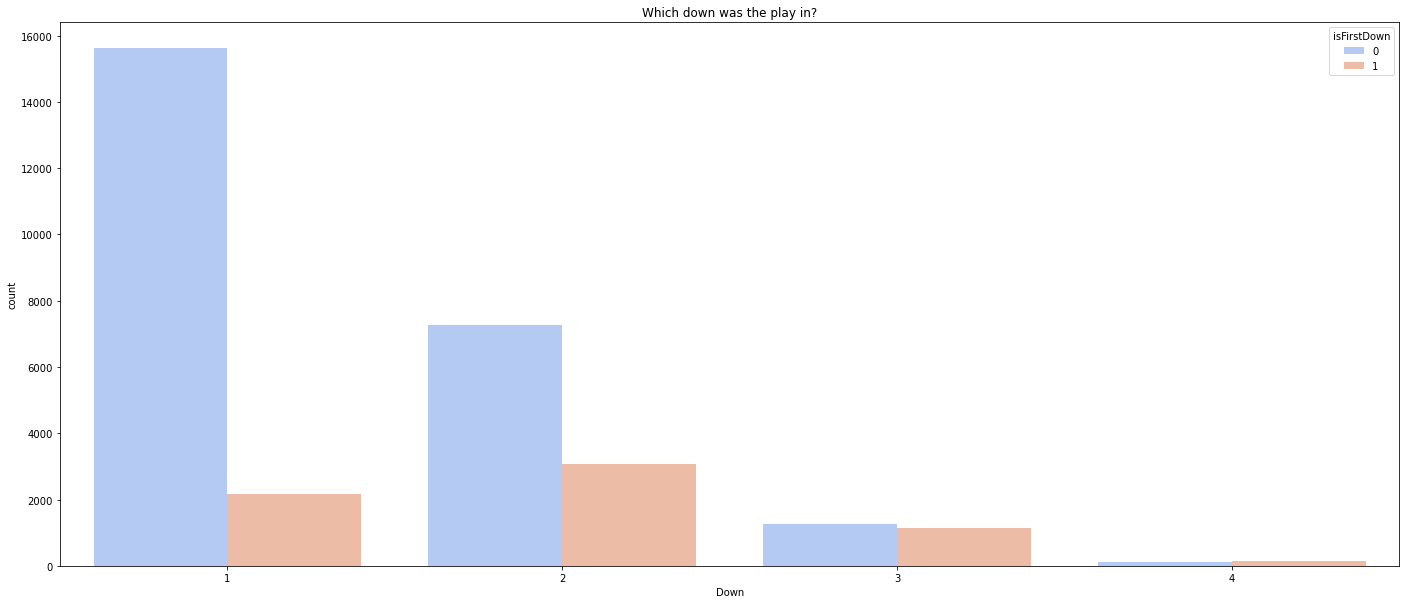

In [32]:
plt.figure(figsize=(24, 10))
snsj=sns.countplot(x=df['Down'], hue=df['isFirstDown'], palette="coolwarm")
plt.title('Which down was the play in?')
plt.savefig("../reports/figures/data_down.png")

In [33]:
pivot_df = pd.pivot_table(df, values=['Yards'], columns=['Down', 'isFirstDown'], aggfunc='count').unstack()
pivot_df.columns.name=None
pivot_df.columns=['Failed First Down', 'Successful First Down']
col_list = list(pivot_df)
col_list[0], col_list[1] = col_list[1], col_list[0]
pivot_df=pivot_df.reindex(columns=col_list)
pivot_df.index=['First Down','Second Down','Third Down','Fourth Down']
pivot_df

,Successful First Down,Failed First Down
First Down,2178,15625
Second Down,3065,7271
Third Down,1154,1250
Fourth Down,152,115


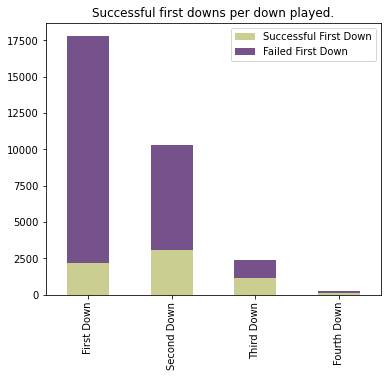

In [34]:

pivot_df.plot.bar(stacked=True, color=["#CBCE91","#76528B"],figsize=(6, 5))
plt.title('Successful first downs per down played.')
plt.savefig("../reports/figures/data_successes_down.png")

### Players getting the ball more, and number of first down successes. 
Just a list of top 20 players who ran the ball in this data set, and the top 20 players with successful first downs. A lot of the same names are showing up in both lists. Later on, removing the identifying information will be removed, including the name and the playerID code. The goal is to have the determining factors to make the first down. 

In [35]:
df['DisplayNameTeam'] = df['DisplayName'] + ' (' + df['PossessionTeam'] + ')'

In [36]:
df['DisplayName'].value_counts()[:15]

Ezekiel Elliott        741
Todd Gurley            667
Jordan Howard          625
Leonard Fournette      595
Joe Mixon              575
Derrick Henry          574
Carlos Hyde            572
Melvin Gordon          555
Christian McCaffrey    548
Adrian Peterson        540
Frank Gore             536
LeSean McCoy           510
Mark Ingram            509
Chris Carson           496
Le'Veon Bell           484
Name: DisplayName, dtype: int64

In [37]:
df[df['isFirstDown'] == 1]['DisplayNameTeam'].value_counts().head(15)

Ezekiel Elliott (DAL)        176
Todd Gurley (LA)             169
Derrick Henry (TEN)          129
Melvin Gordon (LAC)          128
Joe Mixon (CIN)              124
Chris Carson (SEA)           124
Marlon Mack (IND)            120
Alvin Kamara (NO)            115
Leonard Fournette (JAX)      114
Christian McCaffrey (CAR)    112
Jordan Howard (CHI)          105
Kareem Hunt (KC)             104
Aaron Jones (GB)              95
Dalvin Cook (MIN)             94
Sony Michel (NE)              93
Name: DisplayNameTeam, dtype: int64

In [38]:
# Creating a dataframe to calculate which running back is the most successful, based on percentage
dfPlayer = df.groupby(['DisplayNameTeam','isFirstDown']).size().unstack().fillna(0).reset_index()
dfPlayer[1] = dfPlayer[1].astype('int64')
dfPlayer[0] = dfPlayer[0].astype('int64')
dfPlayer['Ttl']  = dfPlayer.apply(lambda x:(int(x[1]) + int(x[0])), axis=1)
dfPlayer['Perc'] = dfPlayer.apply(lambda x:int(x[1]) / (int(x[1]) + int(x[0])), axis=1)
dfPlayerSort = dfPlayer[dfPlayer['Ttl'] >= 400].sort_values('Perc', ascending=False).head(10)
dfPlayerSort

isFirstDown,DisplayNameTeam,0,1,Ttl,Perc
26,Alvin Kamara (NO),303,115,418,0.275120
488,Todd Gurley (LA),498,169,667,0.253373
357,Marlon Mack (IND),355,120,475,0.252632
98,Chris Carson (SEA),372,124,496,0.250000
205,Ezekiel Elliott (DAL),565,176,741,0.237517
309,Kareem Hunt (KC),343,104,447,0.232662
374,Melvin Gordon (LAC),427,128,555,0.230631
127,Dalvin Cook (MIN),322,94,416,0.225962
173,Derrick Henry (TEN),445,129,574,0.224739
394,Nick Chubb (CLE),319,91,410,0.221951


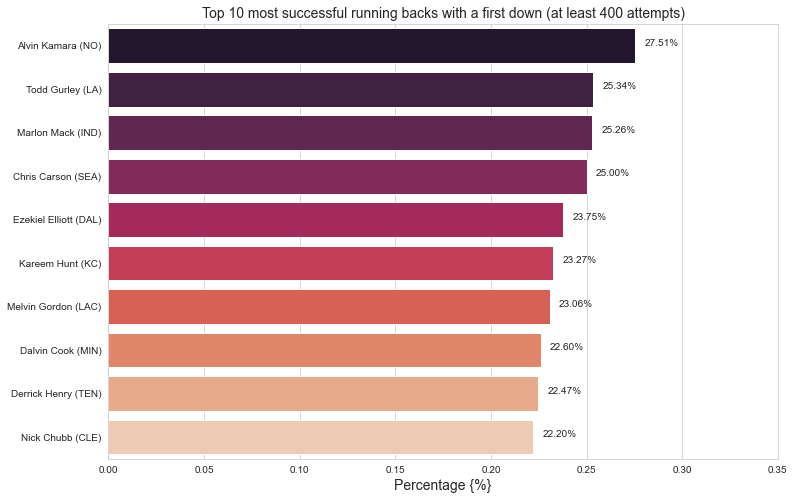

In [39]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
snsj=sns.barplot(x=dfPlayerSort['Perc'], y=dfPlayerSort['DisplayNameTeam'], palette="rocket")
plt.title('Top 10 most successful running backs with a first down (at least 400 attempts)', fontdict={'fontsize':14})
plt.ylabel('')
plt.xlabel('Percentage {%}', fontdict={'fontsize':14})
plt.xlim([0,0.35])

total = len(df['DisplayNameTeam'])
for p in snsj.patches:
        percentage = '{:,.2%}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.005
        y = p.get_y() + p.get_height()/2
        snsj.annotate(percentage, (x, y))


plt.savefig("../reports/figures/data_playerfirstdown.png")

The above chart shows the top 10 players that have the most successful first down percentage. Funnily enough, the top 5 players with the best percentage are all 26 years old or younger, and with a 40-yard combine of between 4.50 and 4.58, which is an amazing time for a running back. 

## Position analysis
This is the variable of the position of the player making the running play. Over 93% of the data is running backs, and the rest are very situational, like when the quarterback makes the run. So more data is dropped so that we are only looking at the running backs that are doing the running.

In [40]:
df['Position'].value_counts()

RB    28694
HB      922
WR      826
FB      207
QB       99
TE       48
CB       10
DT        2
G         1
DE        1
Name: Position, dtype: int64

In [41]:
df['Position'].value_counts(normalize = True).mul(100).round(1)

RB    93.1
HB     3.0
WR     2.7
FB     0.7
QB     0.3
TE     0.2
CB     0.0
DT     0.0
G      0.0
DE     0.0
Name: Position, dtype: float64

In [42]:
df = df[(df['Position'] == 'RB')]

## Player Height vs Weight
While doing separate graphs for height and weight, a correlation was noticed between the two data sets. Enough so that we can remove one over the other. Because the number of outliers was higher in the weight category, it was determined that we can drop weight. 
(This could be done in the bivariate field)

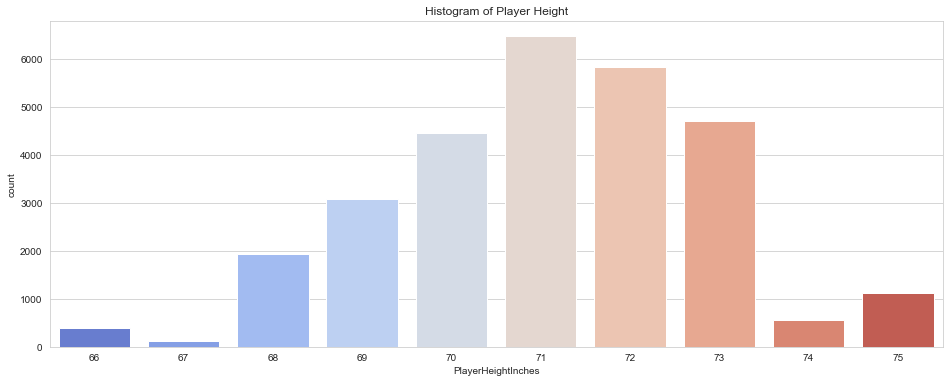

In [43]:
plt.figure(figsize=(16, 6))
snsj=sns.countplot(x=df['PlayerHeightInches'], palette="coolwarm")
plt.title('Histogram of Player Height')
plt.savefig("../reports/figures/data_height.png")

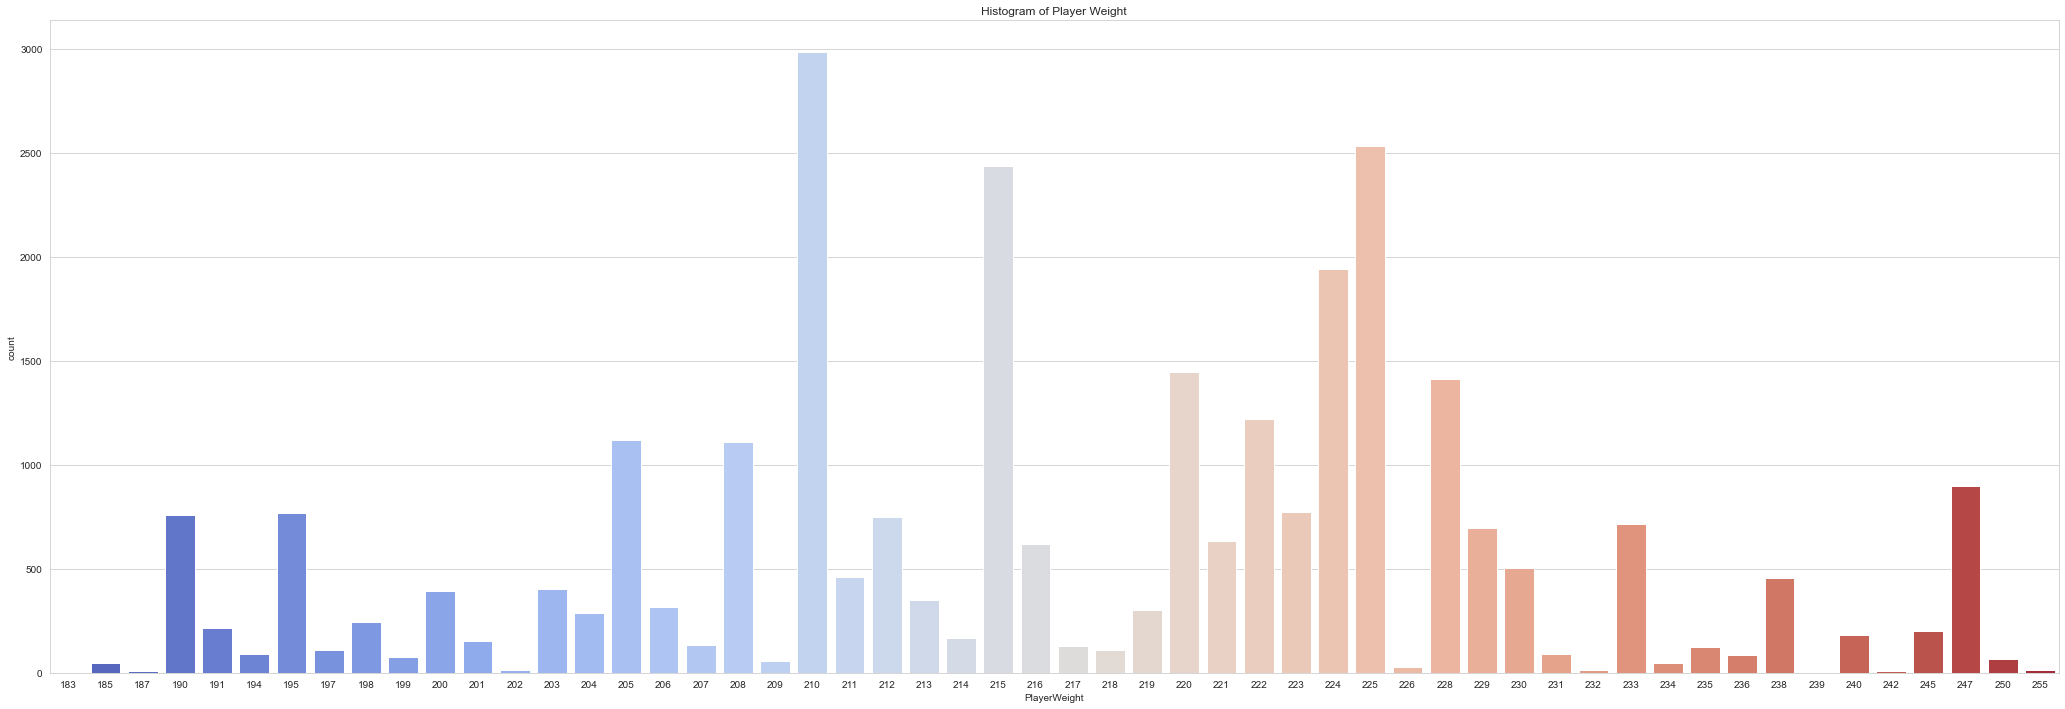

In [44]:
plt.figure(figsize=(36, 12))
snsj=sns.countplot(x=df['PlayerWeight'], palette="coolwarm")
plt.title('Histogram of Player Weight')
plt.savefig("../reports/figures/data_weight.png")

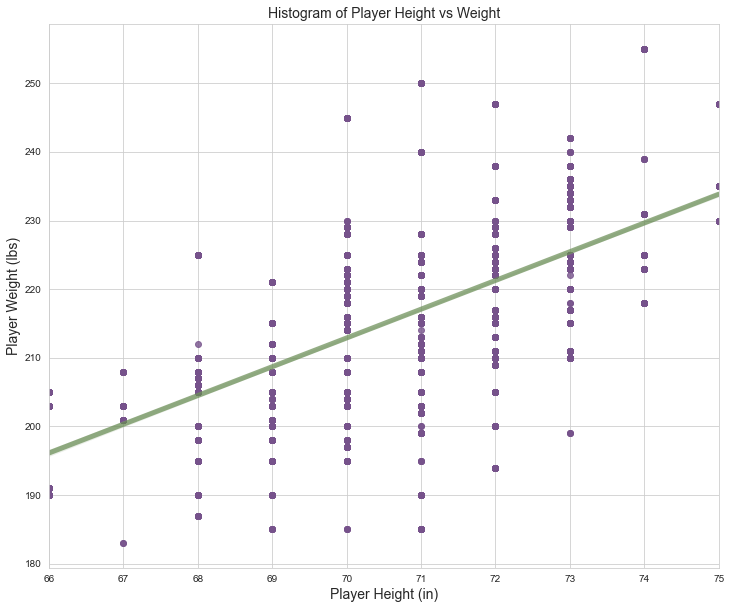

In [45]:
plt.figure(figsize=(12, 10))
snsj=sns.regplot(x=df['PlayerHeightInches'], y=df['PlayerWeight'], \
                 line_kws={"color":"#678b52","alpha":0.7,"lw":5}, color="#76528B", ci=100)
plt.title('Histogram of Player Height vs Weight', fontdict={'fontsize':14})
plt.ylabel('Player Weight (lbs)', fontdict={'fontsize':14})
plt.xlabel('Player Height (in)', fontdict={'fontsize':14})
plt.savefig("../reports/figures/data_height_vs_weight.png")

## Dis and Orientation Analysis
These two fields are part of the advanced analytics of the data. It tells which direction the player was running immediately after the snap, and the dis is the distance ran right after the snap. The variance will be checked with this data later on to determine if it's worth keeping. 

In [46]:
df['Dis'].value_counts().sort_index()

0.00      21
0.01      25
0.02       7
0.03      10
0.04       7
0.05      11
0.06      12
0.07      11
0.08      13
0.09      16
0.10      27
0.11      20
0.12      23
0.13      22
0.14      28
0.15      50
0.16      42
0.17      57
0.18      60
0.19      90
0.20      75
0.21      83
0.22      96
0.23     108
0.24     119
0.25     131
0.26     138
0.27     160
0.28     180
0.29     220
0.30     235
0.31     314
0.32     413
0.33     458
0.34     554
0.35     625
0.36     763
0.37     850
0.38     917
0.39    1124
0.40    1134
0.41    1239
0.42    1317
0.43    1318
0.44    1353
0.45    1343
0.46    1299
0.47    1209
0.48    1153
0.49    1054
0.50    1008
0.51     937
0.52     843
0.53     753
0.54     701
0.55     647
0.56     582
0.57     524
0.58     432
0.59     370
0.60     280
0.61     217
0.62     206
0.63     171
0.64     112
0.65      65
0.66      70
0.67      59
0.68      30
0.69      31
0.70      18
0.71      16
0.72      13
0.73      13
0.74       9
0.75       7
0.76       9

In [47]:
df['Dis'].nunique()

87

In [48]:
print(df['Orientation'].value_counts().sort_index().head(10))
print(df['Orientation'].value_counts().sort_index().tail(10))

0.00    1
0.02    1
0.03    2
0.04    1
0.05    1
0.06    2
0.09    2
0.11    3
0.16    1
0.17    1
Name: Orientation, dtype: int64
359.84    3
359.86    3
359.87    1
359.88    1
359.89    3
359.90    1
359.91    1
359.93    1
359.99    1
360.00    1
Name: Orientation, dtype: int64


## Box plots to find outliers
Boxplots were created to check for outliers on several variables. And it looks like a lot of the attributes, like Yards to Touchdown and "Defenders in the Box" either didn't have any outliers, or had outiers that were part of a natural progression, so we can overlook them.

The only outliers that could be removed is the distance field. There was a lot of outliers above 20 yards. The odds of any play needed 20 or more yards to get the first down are pretty rare so they can be removed. Usually that happens when previous plays resulted in penalites on the offense, or sacking the quarterback in a poorly executed passing play. 

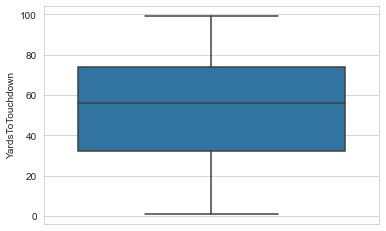

In [49]:
sns.boxplot( y=df["YardsToTouchdown"] )

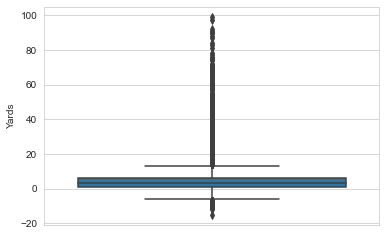

In [50]:
sns.boxplot( y=df["Yards"] )

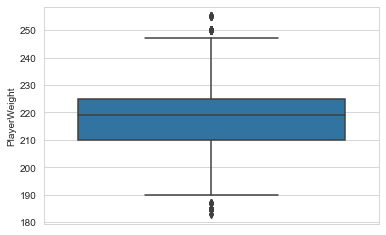

In [51]:
sns.boxplot( y=df["PlayerWeight"] )

In [52]:
# Removing outliers based on height. Might not be needed. 
# df = df[(df['PlayerHeightInches'] <= 75)]

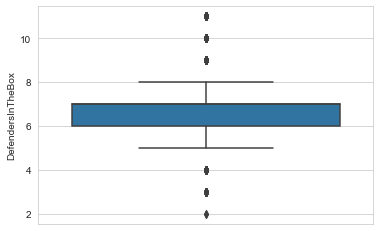

In [53]:
sns.boxplot( y=df["DefendersInTheBox"] )

In [54]:
df[(df['DefendersInTheBox'] >=8) | (df['DefendersInTheBox'] <=5)]['isFirstDown'].value_counts()

0    6305
1    1832
Name: isFirstDown, dtype: int64

In [55]:
df["Distance"].var()

14.623961550884733

In [56]:
df[df["Distance"]>20]["isFirstDown"].value_counts()

0    182
1      1
Name: isFirstDown, dtype: int64

In [57]:
df = df[df["Distance"]<=20]

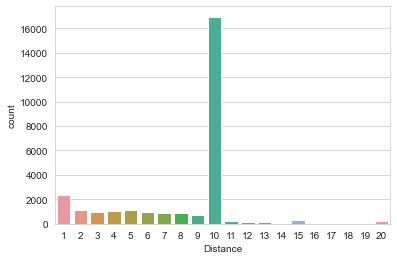

In [58]:
sns.countplot( x=df["Distance"])

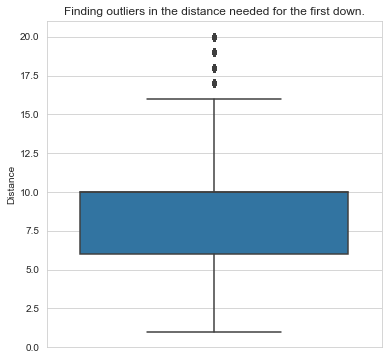

In [59]:
plt.figure(figsize=(6, 6))
sns.boxplot( y=df["Distance"])
plt.title('Finding outliers in the distance needed for the first down.')
plt.ylim([0,21])
plt.savefig("../reports/figures/data_distance.png")

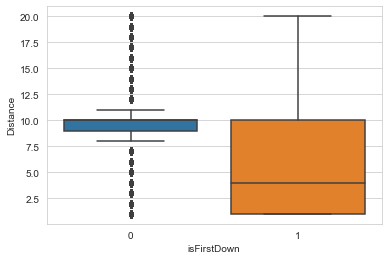

In [60]:
sns.boxplot( y=df["Distance"], x=df['isFirstDown'] )

In [61]:
#  Tried to make a categorical variable for the distance field, but it still was barely a normalized data set.
df['DistanceBins'] = pd.cut(x=df['Distance'], bins=[-np.inf, 5.5, 10.5, 16.5, np.inf], labels=[1,2,3,4])
df['DistanceBins'].value_counts().sort_index()

1     6636
2    20406
3     1004
4      465
Name: DistanceBins, dtype: int64

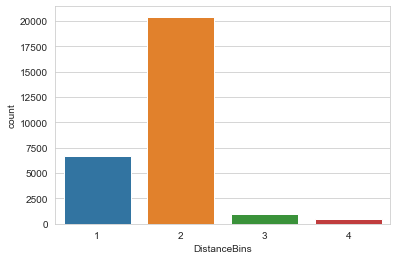

In [62]:
sns.countplot( x=df["DistanceBins"])

In [63]:
df.drop('DistanceBins', axis=1, inplace=True)

## College
For some, which college the player went to can identify the type of skillset the players have. This is a printout and a graph of the top 20 colleges represented in the data. Alabama leads this list, which makes perfect sense because of the fact they are one of the most dominant college football teams in the last decade, and the players representin them include Derrick Henry and Mark Ingram.

In [64]:
print(df['PlayerCollegeName'].value_counts()[:20])
print(df['PlayerCollegeName'].value_counts().idxmax())

Alabama             1869
Georgia             1453
Ohio State          1400
Pittsburgh          1211
Oklahoma            1069
Indiana             1062
Wisconsin            879
Florida State        853
Oregon               809
Auburn               725
Miami                710
Stanford             668
California           662
Boise State          645
Louisiana State      593
Oklahoma State       529
Georgia Southern     496
Michigan State       487
South Florida        478
Toledo               472
Name: PlayerCollegeName, dtype: int64
Alabama


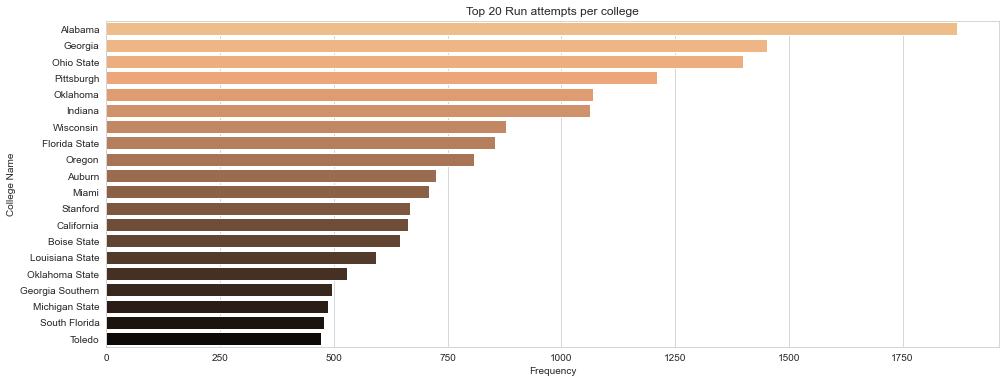

In [65]:
plt.figure(figsize=(16, 6))
snsj=sns.countplot(y=df['PlayerCollegeName'], palette="copper_r", order=df['PlayerCollegeName'].value_counts()[:20].index.tolist())
plt.title('Top 20 Run attempts per college')
plt.xlabel('Frequency')
plt.ylabel('College Name')
plt.savefig("../reports/figures/data_playercollege.png")

## Pivot Table Analysis

In [66]:
pd.pivot_table(df, values=['Yards'], columns=['isFirstDown', 'Down'], aggfunc='mean').unstack()

Down                       1         2         3         4
      isFirstDown                                         
Yards 0             2.732800  2.084844  1.516636 -0.663265
      1            15.628983  9.087048  6.390640  4.350365

In [67]:
dfByTeam = pd.pivot_table(df, values=['Yards'], columns=['isFirstDown', 'PossessionTeam'], aggfunc='mean').unstack().transpose()
dfByTeam.columns = ['Failed First Down','Successful First Down']
dfByTeam.index.name=None
dfByTeam.reset_index(inplace=True)

In [100]:
dfByTeam.sort_values('Successful First Down', ascending=True, inplace=True)
dfByTeam[:5]

,index,Failed First Down,Successful First Down
6,CIN,2.281250,8.600000
0,ARI,2.477811,8.816456
20,NE,2.662907,9.016461
29,TB,2.311522,9.245161
11,GB,2.794498,9.263441


In [101]:

dfByTeam.sort_values('Successful First Down', ascending=False, inplace=True)
dfByTeam[:5]

,index,Failed First Down,Successful First Down
22,NYG,2.345886,12.810811
18,MIA,2.380399,12.317460
28,SF,2.361647,12.218182
23,NYJ,2.131544,12.115646
19,MIN,2.468215,12.044554


In [69]:
stats = dfByTeam.describe()
stats.loc['var'] = dfByTeam.var().tolist()
stats.loc['sd'] = dfByTeam.std().tolist()
stats.loc['skew'] = dfByTeam.skew().tolist()
stats.loc['kurt'] = dfByTeam.kurtosis().tolist()
stats.transpose()

,count,mean,std,min,25%,50%,75%,max,var,sd,skew,kurt
Failed First Down,32.0,2.458866,0.190511,2.131544,2.330705,2.432746,2.599732,2.830116,0.036294,0.190511,0.357064,-0.781819
Successful First Down,32.0,10.640088,1.147497,8.600000,9.679990,10.872333,11.343841,12.810811,1.316749,1.147497,-0.013153,-1.070916


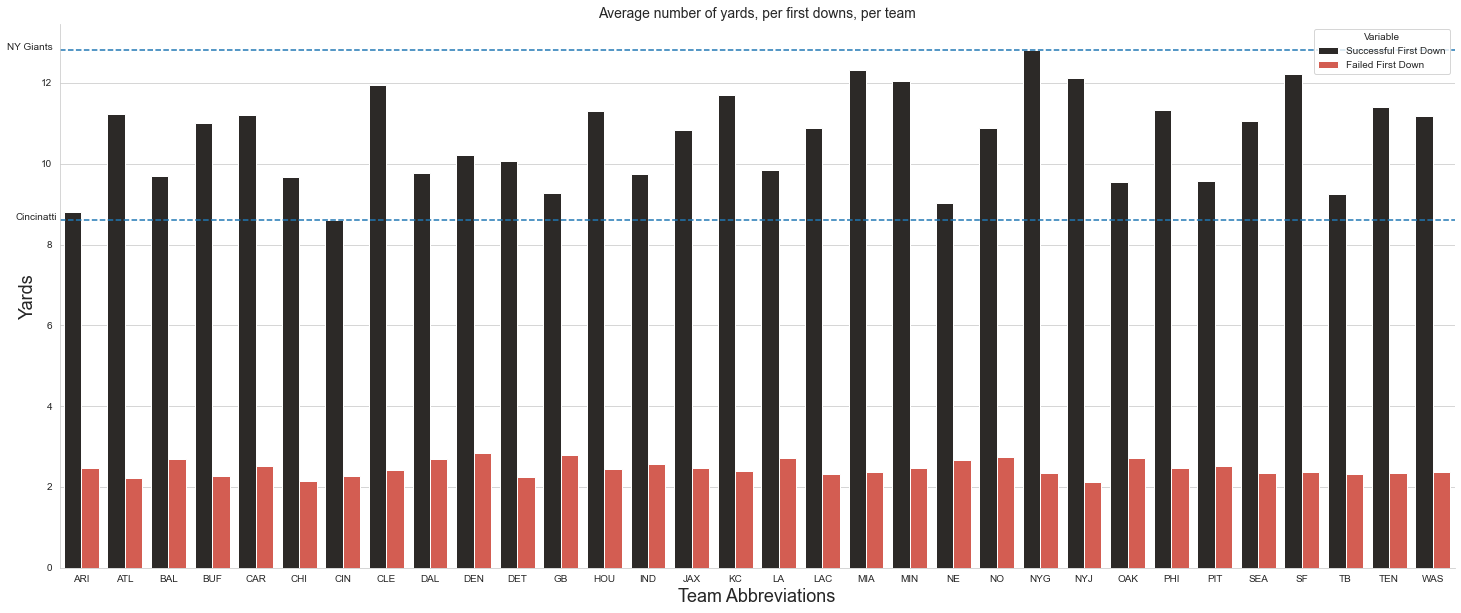

In [107]:
fig, ax1 = plt.subplots(figsize=(25, 10))
tidy = dfByTeam.melt(id_vars='index').rename(columns=str.title).sort_values('Index')
sns.barplot(x='Index', y='Value', hue='Variable', data=tidy, ax=ax1, palette=["#2D2926FF","#E94B3CFF"])
plt.title('Average number of yards, per first downs, per team', fontdict={'fontsize':14})
plt.xlabel('Team Abbreviations', fontdict={'fontsize':18})
plt.ylabel('Yards', fontdict={'fontsize':18})

ax1.axhline(8.600000, ls='--')
ax1.axhline(12.810811, ls='--')

# ax1.text(0.5,25, "Some text")
ax1.text(-1.5,8.600000, "Cincinatti")
ax1.text(-1.7,12.810811, "NY Giants")

sns.despine(fig)
plt.savefig("../reports/figures/data_teamSuccessVsFailure.png")

## Dropping fields and saving the current state
Two sets of attributes are being dropped. The first set are dropping columns mentioned in this notebook, and other unnecessary fields. The other set of fields dropped can identify the player and the team making the play. We don't want the data to be skewed because some teams are better at the running game than others, and we don't want that to be a factor to the results. 

At the end of the day, after this process, we elimated enough fields to have a data set of 28511 records and 50 attributes.

In [ ]:
# Dropping the fields that are unnecessary
df.drop(['Dis','NflId','NflIdRusher','JerseyNumber','DisplayName','DisplayNameTeam','GameClock','Temperature','WindSpeed', \
         'WindDirection','Team','FieldPosition','FieldPositionCode','PlayerWeight'], axis=1, inplace=True)

In [ ]:

df.drop(['PossessionTeam','PossessionTeamAbbrCode','HomeTeamAbbr','HomeTeamAbbrCode', \
             'VisitorTeamAbbr','VisitorTeamAbbrCode','PlayerCollegeName','PlayerCollegeNameCode'], axis=1, inplace=True)


In [ ]:
df.shape

In [ ]:
df.to_csv("../data/processed/data_univ.csv")